<a href="https://colab.research.google.com/github/ferhat00/LLM/blob/main/ChatGPT_Analyse_Satellite_Imagery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


0: 544x640 1 car, 98.3ms
Speed: 3.0ms preprocess, 98.3ms inference, 0.9ms postprocess per image at shape (1, 3, 544, 640)


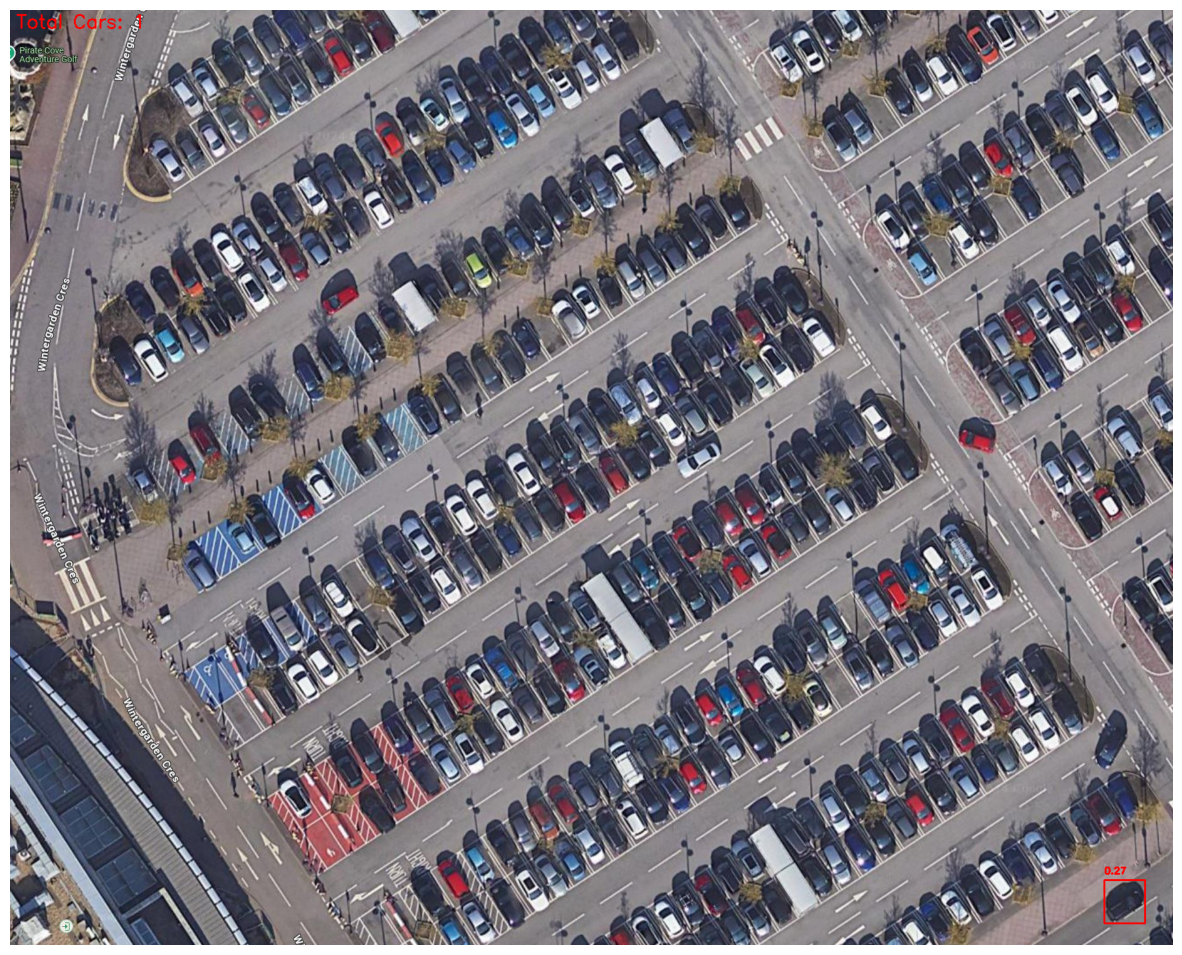

Total cars detected: 1
Results saved to detected_cars.jpg

image 1/1 /content/Capture.JPG: 544x640 54 cars, 91.6ms
Speed: 2.7ms preprocess, 91.6ms inference, 1.5ms postprocess per image at shape (1, 3, 544, 640)


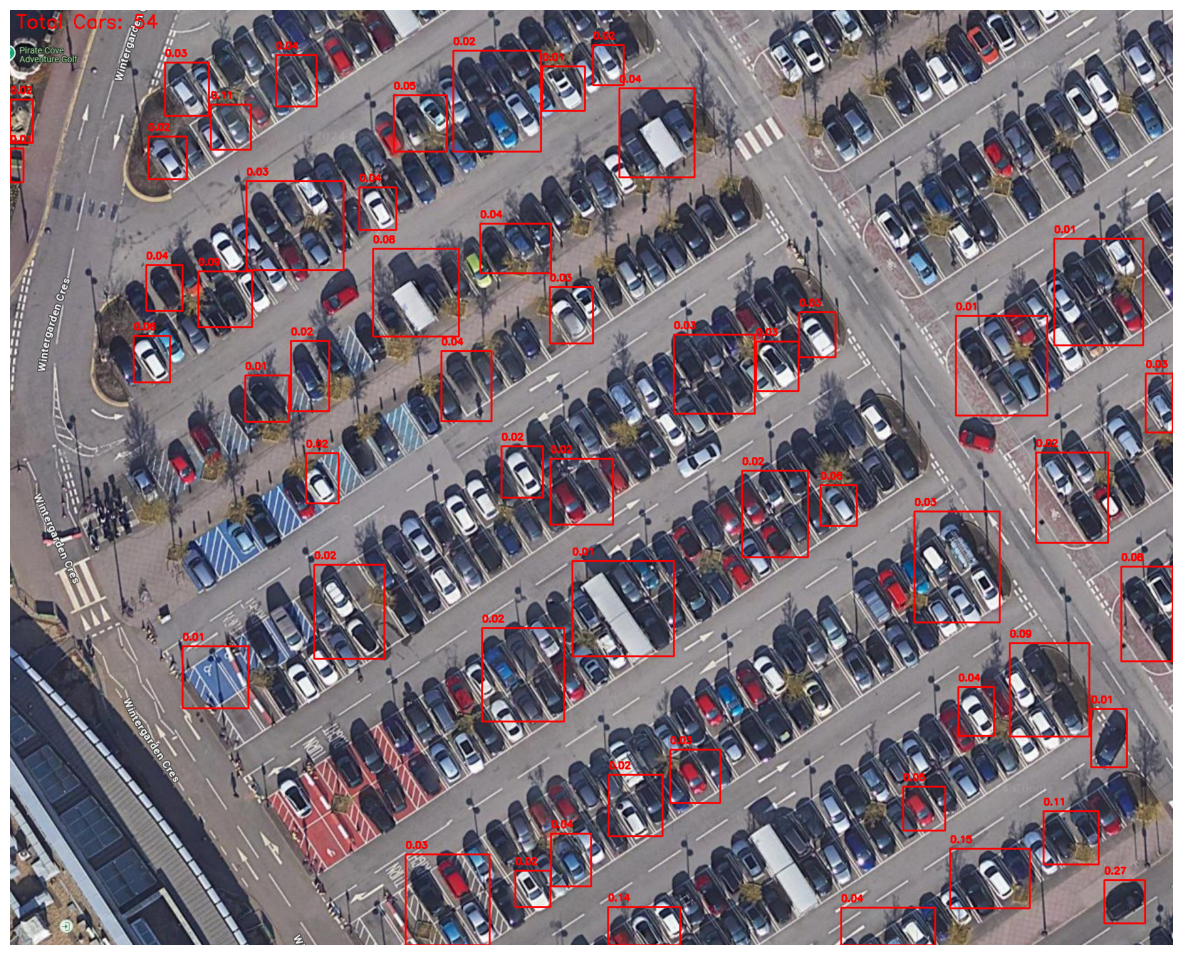

In [21]:
from ultralytics import YOLO
import cv2
import numpy as np
from PIL import Image
import torch
import matplotlib.pyplot as plt


def detect_cars_yolo(image_path):
    # Load the YOLOv8 model
    model = YOLO('yolov8n.pt')  # Load the smallest YOLOv8 model for speed

    # Read image
    img = cv2.imread(image_path)

    # Run inference with specific parameters for small objects
    results = model(img, conf=0.25, iou=0.45, classes=[2])  # class 2 is 'car' in COCO dataset

    # Get the original image for drawing
    output_img = img.copy()

    # Counter for cars
    car_count = 0

    # Process detections
    if len(results) > 0:
        boxes = results[0].boxes
        car_count = len(boxes)

        # Draw each detection
        for box in boxes:
            # Get box coordinates
            x1, y1, x2, y2 = map(int, box.xyxy[0])

            # Draw bounding box
            cv2.rectangle(output_img, (x1, y1), (x2, y2), (0, 0, 255), 2)

            # Add confidence score
            conf = float(box.conf[0])
            cv2.putText(output_img, f'{conf:.2f}', (x1, y1 - 10),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

    # Add total count to image
    cv2.putText(output_img, f'Total Cars: {car_count}', (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # Display result
    plt.figure(figsize=(15, 15))
    plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    return car_count, output_img

def save_results(output_img, car_count, output_path='detected_cars.jpg'):
    """Save the output image with detections"""
    cv2.imwrite(output_path, output_img)
    print(f"Results saved to {output_path}")

# For improved aerial vehicle detection, we can add custom parameters
def detect_cars_aerial(image_path):
    # Initialize YOLOv8 with custom parameters for aerial imagery
    model = YOLO('yolov8n.pt')

    # Custom parameters for aerial imagery
    conf_threshold = 0.01  # Lower confidence threshold for small objects
    iou_threshold = 0.00001   # Lower IoU threshold for overlapping vehicles

    # Read image
    img = cv2.imread(image_path)

    # Inference with custom parameters
    results = model(
        source=image_path,
        conf=conf_threshold,
        iou=iou_threshold,
        classes=[2],  # Only detect cars
        agnostic_nms=True,  # Class-agnostic NMS
        max_det=1000  # Maximum detections per image
    )

    # Get the original image for drawing
    output_img = img.copy()

    # Counter for cars
    car_count = 0

    # Process detections
    if len(results) > 0:
        boxes = results[0].boxes
        car_count = len(boxes)

        # Draw each detection
        for box in boxes:
            # Get box coordinates
            x1, y1, x2, y2 = map(int, box.xyxy[0])

            # Draw bounding box
            cv2.rectangle(output_img, (x1, y1), (x2, y2), (0, 0, 255), 2)

            # Add confidence score
            conf = float(box.conf[0])
            cv2.putText(output_img, f'{conf:.2f}', (x1, y1 - 10),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

    # Add total count to image
    cv2.putText(output_img, f'Total Cars: {car_count}', (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # Display result
    plt.figure(figsize=(15, 15))
    plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    return car_count, output_img, results

if __name__ == "__main__":
    # Install required packages if not already installed
    try:
        import ultralytics
    except ImportError:
        print("Installing required packages...")
        !pip install ultralytics

    image_path = '/content/Capture.JPG'  # Replace with your image path

    # Regular detection
    car_count, output_img = detect_cars_yolo(image_path)
    print(f"Total cars detected: {car_count}")

    # Save results
    save_results(output_img, car_count)

    # Optional: Run aerial-optimized detection
    aerial_results = detect_cars_aerial(image_path)
    #print(f"Cars detected (aerial-optimized): {len(aerial_results[2].boxes)}")

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 904.3/904.3 kB 15.6 MB/s eta 0:00:00



image 1/1 /content/Capture.JPG: 544x640 1 car, 90.8ms
Speed: 2.8ms preprocess, 90.8ms inference, 0.9ms postprocess per image at shape (1, 3, 544, 640)
Total number of cars detected: 1


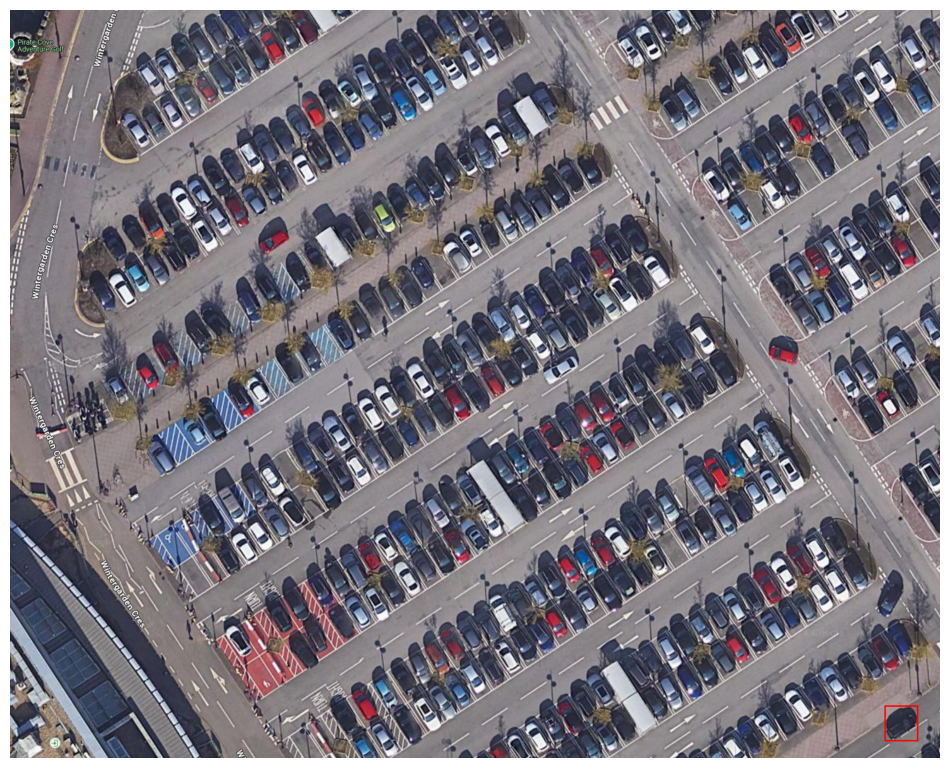

Processed image saved to /mnt/data/parking_lot_with_cars_detected.jpeg


In [4]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load the YOLOv8 model pre-trained on COCO dataset
model = YOLO('yolov8n.pt')  # Use a smaller model for efficiency

# Path to the uploaded image
image_path = '/content/Capture.JPG'

# Load and predict
results = model(image_path)

# Extract results
image = cv2.imread(image_path)
car_count = 0

# Iterate through detected objects
for result in results:
    for box in result.boxes:
        cls = int(box.cls[0])  # Class ID
        if cls in [2, 3, 5, 7]:  # Class IDs for 'car', 'motorbike', 'bus', 'truck'
            car_count += 1
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Red bounding box

# Display the results
print(f"Total number of cars detected: {car_count}")
plt.figure(figsize=(12, 12))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Optionally, save the image with bounding boxes
output_path = '/mnt/data/parking_lot_with_cars_detected.jpeg'
cv2.imwrite(output_path, image)
print(f"Processed image saved to {output_path}")

In [ ]:
!pip install ultralytics opencv-python pillow torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 904.3/904.3 kB 16.5 MB/s eta 0:00:00


In [5]:
import cv2
import numpy as np
from ultralytics import YOLO

def detect_cars_in_parking_lot(image_path, model_path="yolov8n.pt", conf_threshold=0.5):
    """
    Detects cars in a parking lot image using YOLOv8 and draws bounding boxes in red.
    Returns:
      - The annotated image (as a NumPy array)
      - The number of cars detected
    """

    # Load the YOLOv8 detection model
    model = YOLO(model_path)  # e.g. 'yolov8n.pt' for detection

    # Read the image with OpenCV
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Could not read the image at {image_path}")

    # Inference with YOLOv8
    results = model.predict(source=img,
                            conf=conf_threshold,  # confidence threshold
                            imgsz=640)            # image size for inference (can adjust as needed)

    # YOLOv8 returns a list of Results (one per image); we only have 1 input image
    result = results[0]

    # class names as recognized by the model
    class_names = model.names  # e.g. {0: 'person', 1: 'bicycle', 2: 'car', ...}

    # For counting cars
    car_count = 0

    # Draw bounding boxes
    for box in result.boxes:
        # box.cls is the class ID; box.conf is the confidence; box.xyxy are coords
        cls_id = int(box.cls[0])
        conf = float(box.conf[0])
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # bounding box coords

        # Check if this detection is a 'car'
        if class_names[cls_id] == 'car':
            car_count += 1
            # Draw a red rectangle around the car
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
            # (Optional) put label text above the box
            cv2.putText(img,
                        f"car {conf:.2f}",
                        (x1, y1 - 5),
                        cv2.FONT_HERSHEY_SIMPLEX,
                        0.6,
                        (0, 0, 255),
                        2)

    return img, car_count

if __name__ == "__main__":
    # Path to your parking lot satellite image
    image_path = "/content/Capture.JPG"

    # Detect cars and annotate image
    annotated_image, number_of_cars = detect_cars_in_parking_lot(image_path,
                                                                 model_path="yolov8n.pt",
                                                                 conf_threshold=0.5)

    print(f"Number of cars detected: {number_of_cars}")

    # Show the annotated image (for debugging or demonstration)
   # cv2.imshow("Annotated Parking Lot", annotated_image)
   # cv2.waitKey(0)
   # cv2.destroyAllWindows()

    # (Optional) Save to disk
    cv2.imwrite("parking_lot_annotated.jpg", annotated_image)
    print("Annotated image saved as 'parking_lot_annotated.jpg'")


0: 544x640 (no detections), 101.8ms
Speed: 2.7ms preprocess, 101.8ms inference, 0.6ms postprocess per image at shape (1, 3, 544, 640)
Number of cars detected: 0
Annotated image saved as 'parking_lot_annotated.jpg'
